In [1]:
from google.colab import files
uploaded = files.upload()

Saving car_age_price.csv to car_age_price.csv


In [4]:
import pandas as pd
path="/content/car_age_price.csv"
df=pd.read_csv(path)
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Separate the features (Year) and the target variable (Price)
X = df[['Year']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Lasso Regression
lasso_reg = Lasso(alpha=0.1) # You can adjust the alpha value
lasso_reg.fit(X_train, y_train)

# Predict on the test set
linear_reg_pred = linear_reg.predict(X_test)
lasso_reg_pred = lasso_reg.predict(X_test)

# Calculate the mean squared error
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_pred)

print("Linear Regression MSE:", linear_reg_mse)
print("Lasso Regression MSE:", lasso_reg_mse)

Linear Regression MSE: 4326906256.829671
Lasso Regression MSE: 4326901608.19506


In [6]:
#2. Create a new DataFrame with the 2022 year
new_data = pd.DataFrame({'Year': [2022]})

# Predict the price using the linear regression model
linear_reg_price = linear_reg.predict(new_data)

# Predict the price using the lasso regression model
lasso_reg_price = lasso_reg.predict(new_data)

print("Predicted Price using Linear Regression:", linear_reg_price[0])
print("Predicted Price using Lasso Regression:", lasso_reg_price[0])

Predicted Price using Linear Regression: 743601.6159450412
Predicted Price using Lasso Regression: 743601.3917776793


In [7]:
#3.Find out which one is performing better
print("Linear Regression MSE:", linear_reg_mse)
print("Lasso Regression MSE:", lasso_reg_mse)

Linear Regression MSE: 4326906256.829671
Lasso Regression MSE: 4326901608.19506


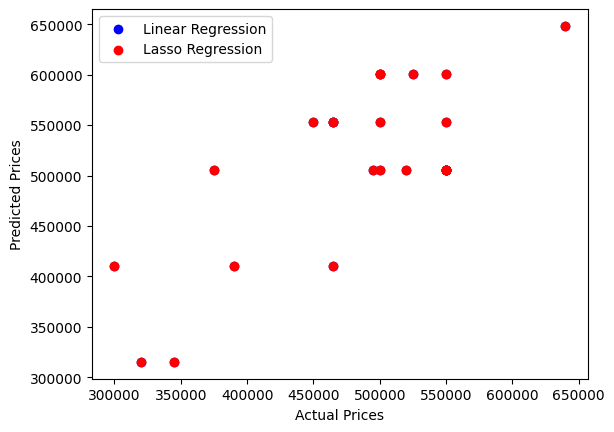

In [8]:
import matplotlib.pyplot as plt

# Scatter plot of actual prices vs predicted prices
plt.scatter(y_test, linear_reg_pred, color='blue', label='Linear Regression')
plt.scatter(y_test, lasso_reg_pred, color='red', label='Lasso Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()